In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11],])

In [3]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [4]:
def kmeans_clustering(data, k, max_iterations=100):
    
    np.random.seed(30)
    center_indices = np.random.choice(len(data), k, replace=False)
    centers = data[center_indices]

    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, center) for center in centers]
            closest_center_index = np.argmin(distances)
            clusters[closest_center_index].append(point)

        
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return centers, clusters

In [5]:
k = 2
centers, clusters = kmeans_clustering(data, k)

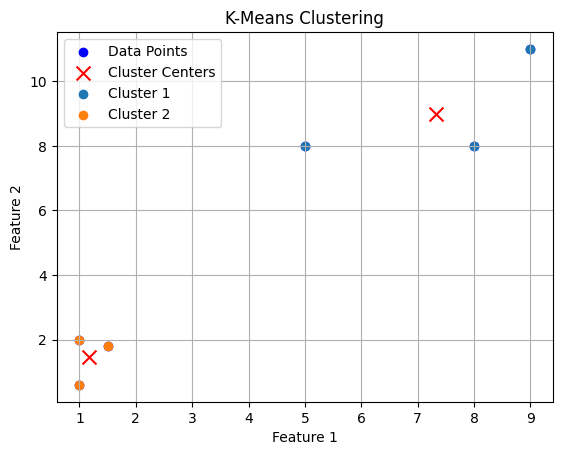

In [10]:
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')

centers_x = [center[0] for center in centers]
centers_y = [center[1] for center in centers]
plt.scatter(centers_x, centers_y, c='red', marker='x', s=100, label='Cluster Centers')

for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.grid(True)